In [53]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
import numpy as np
import pandas as pd
import os
import sklearn.cluster as clust
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.cm as cm


In [2]:
X, y = make_blobs(n_samples=120, centers=4, n_features=2, cluster_std=0.4)

In [3]:
X.shape

(120, 2)

In [4]:
y.shape

(120,)

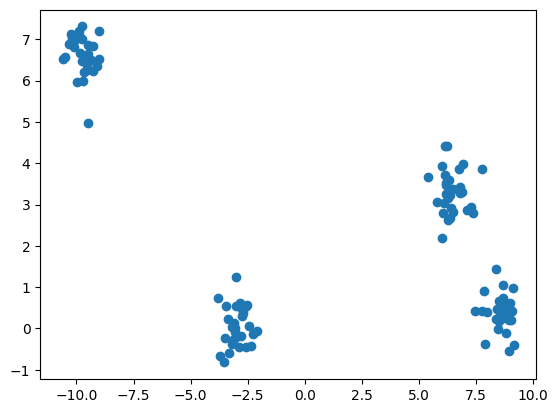

In [5]:
plt.scatter(X[:,0], X[:,1])
plt.show()

In [6]:
kmeans = KMeans(n_clusters=4, random_state=0, n_init="auto").fit(X)
centers = kmeans.cluster_centers_

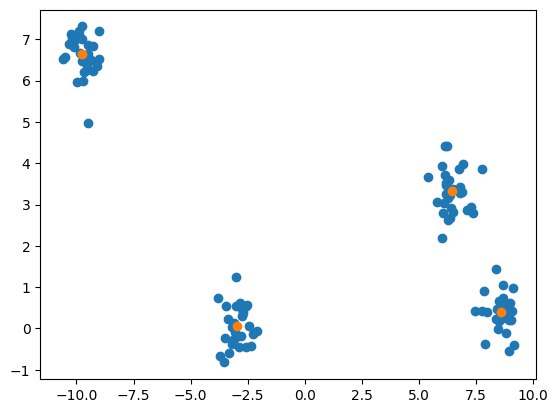

In [7]:
plt.scatter(X[:,0], X[:,1])
plt.scatter(centers[:,0], centers[:,1])
plt.show()

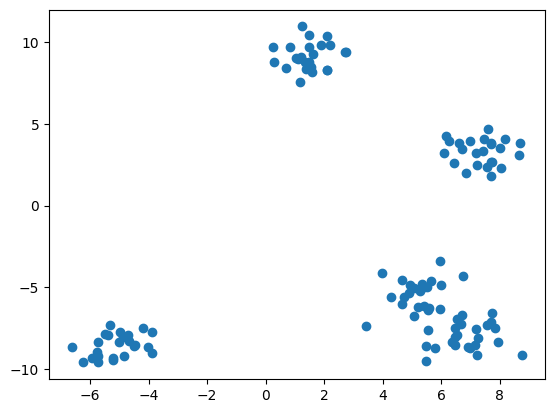

In [8]:
X, y = make_blobs(n_samples=120, centers=5, n_features=2, cluster_std=0.8)
plt.scatter(X[:,0], X[:,1])
plt.show()

In [9]:
kmeans = KMeans(n_clusters=5, random_state=0, n_init="auto").fit(X)
centers_1 = kmeans.cluster_centers_
kmeans = KMeans(n_clusters=4, random_state=0, n_init="auto").fit(X)
centers_2 = kmeans.cluster_centers_

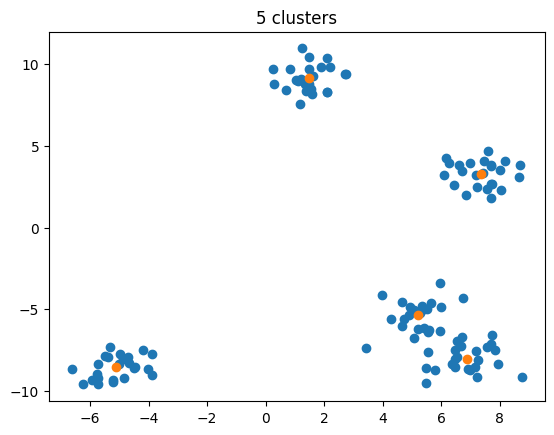

In [10]:
plt.scatter(X[:,0], X[:,1])
plt.scatter(centers_1[:,0], centers_1[:,1])
plt.title('5 clusters')
plt.show()

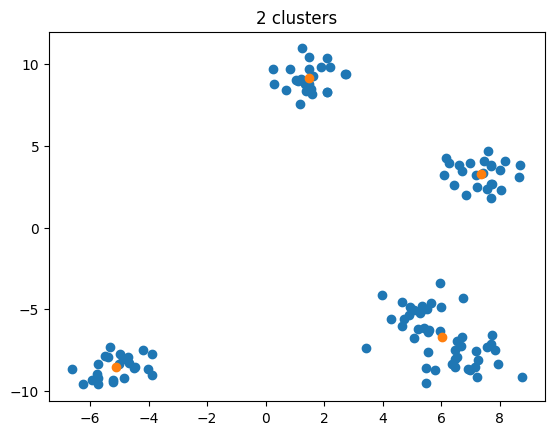

In [11]:
plt.scatter(X[:,0], X[:,1])
plt.scatter(centers_2[:,0], centers_2[:,1])
plt.title('2 clusters')
plt.show()

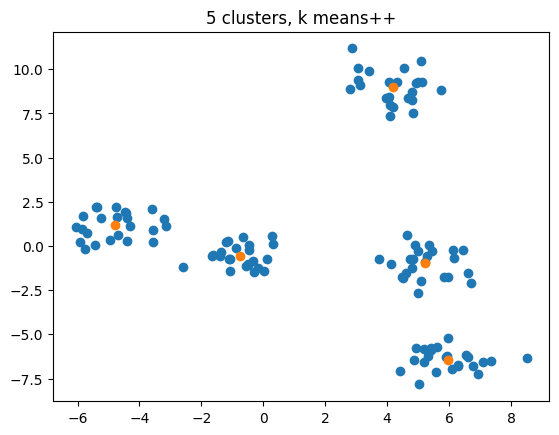

In [12]:
X, y = make_blobs(n_samples=120, centers=5, n_features=2, cluster_std=0.8)
kmeans = KMeans(n_clusters=5, random_state=0, n_init='auto', init="k-means++").fit(X)
centers_3 = kmeans.cluster_centers_
plt.scatter(X[:,0], X[:,1])
plt.scatter(centers_3[:,0], centers_3[:,1])
plt.title('5 clusters, k means++')
plt.show()

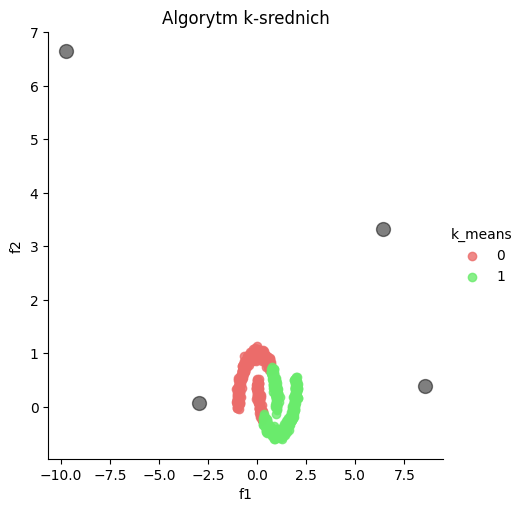

In [19]:
x, y = make_moons(1000, noise=.05, random_state=0)
X_moon = pd.DataFrame(x, columns = ['f1','f2'])
#TODO: Kmeans
km = clust.KMeans(n_clusters=2, init='random', n_init=10, max_iter=300, tol=1e-4, random_state=None)
y_km = km.fit_predict(X_moon)
#Plot

X_moon['k_means'] = y_km
sns.lmplot(data=X_moon, x='f1', y='f2', fit_reg=False, hue = 'k_means', palette = ['#eb6c6a', '#6aeb6c']).set(title='Algorytm k-srednich')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


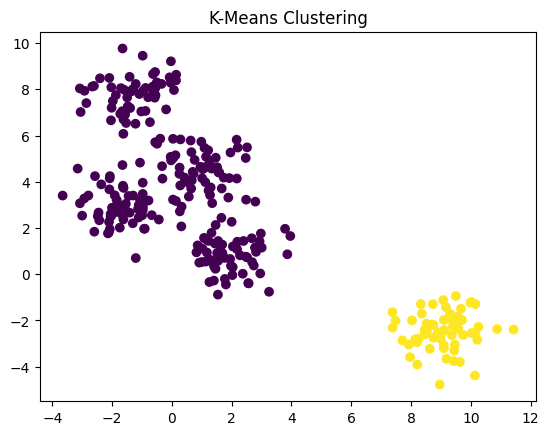

In [31]:
X, y_true = make_blobs(n_samples=300, centers=5,
                       cluster_std=0.8, random_state=0)

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans)
plt.title("K-Means Clustering")
plt.show()


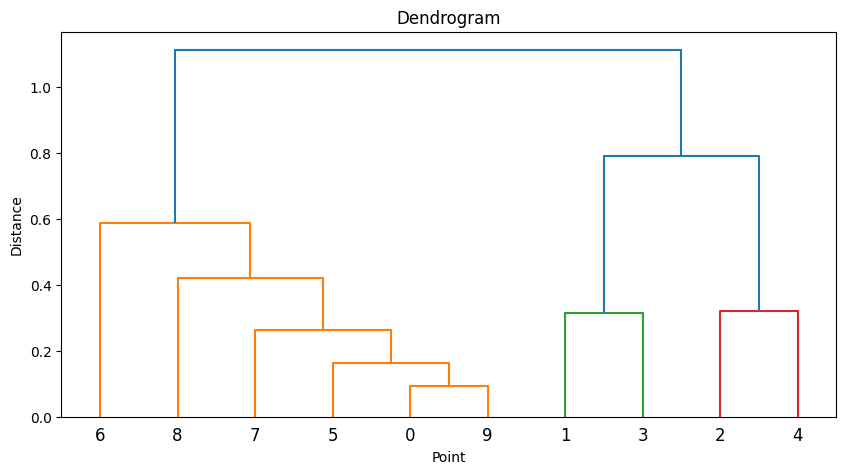

In [37]:
Z = linkage(X, method='ward')
fig = plt.figure(figsize=(10, 5))
dn = dendrogram(Z)
plt.title("Dendrogram")
plt.xlabel("Point")
plt.ylabel("Distance")
plt.show()

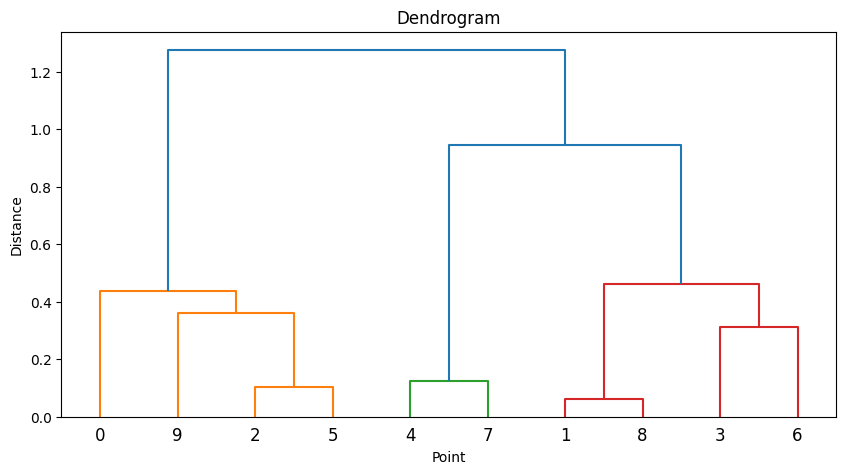

In [38]:
X = np.random.rand(10, 2)

Z = linkage(X, method='ward')
fig = plt.figure(figsize=(10, 5))
dn = dendrogram(Z)
plt.title("Dendrogram")
plt.xlabel("Point")
plt.ylabel("Distance")
plt.show()

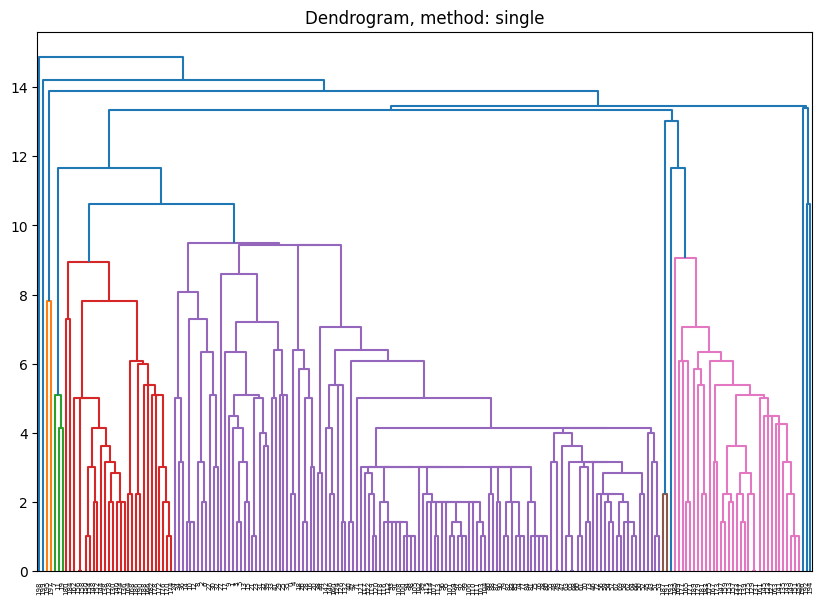

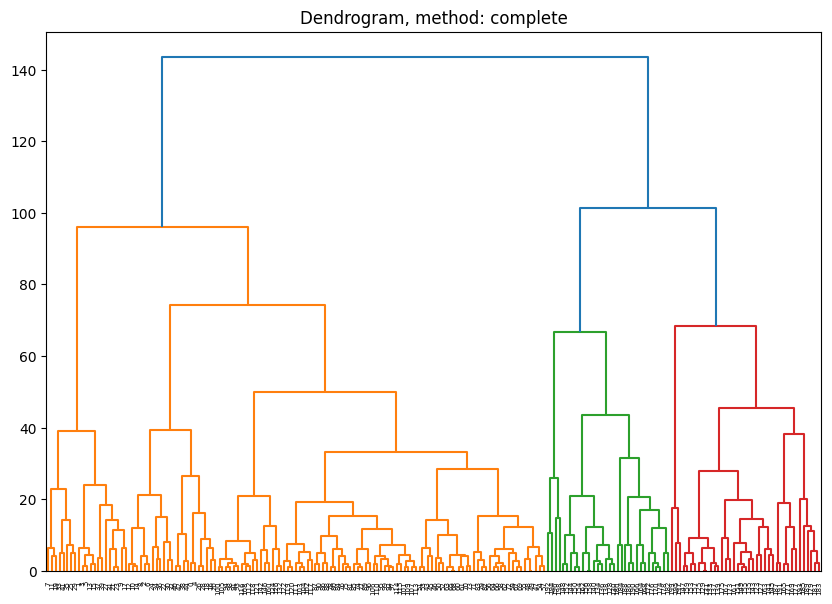

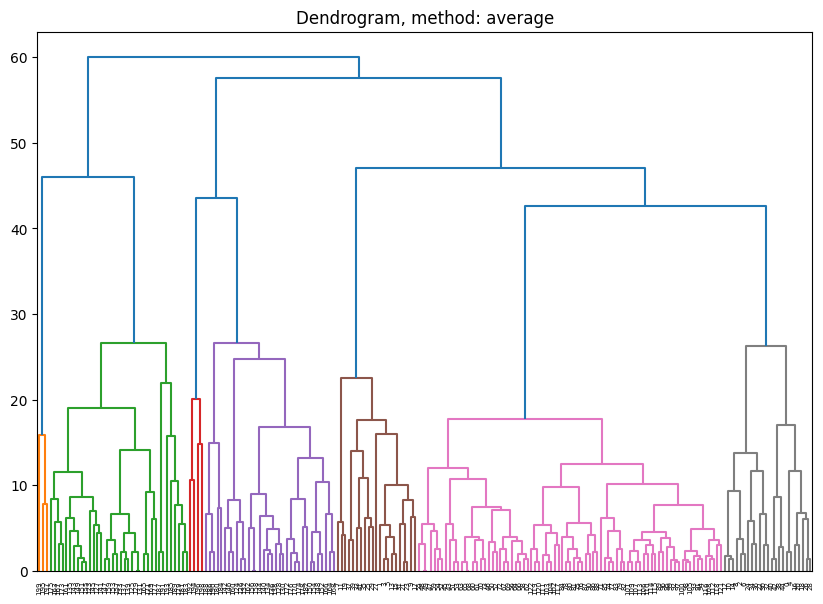

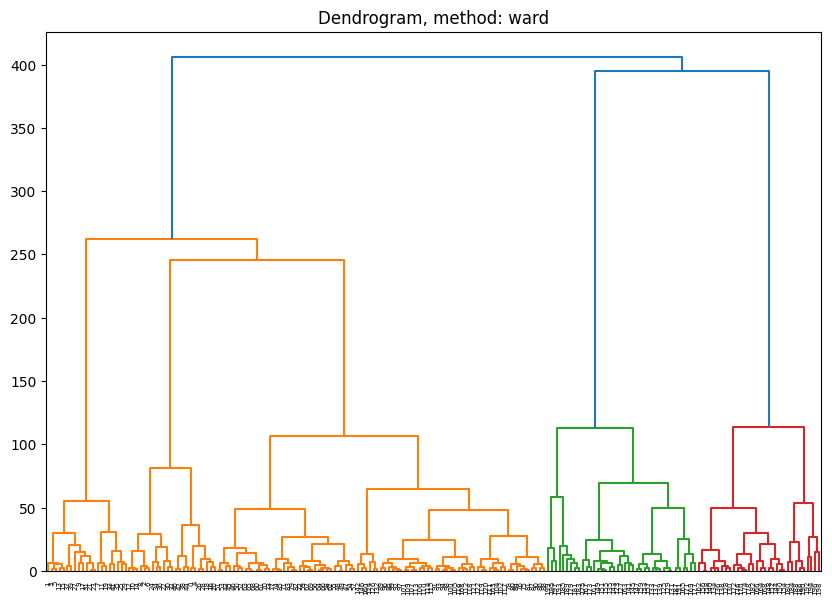

In [45]:
path = os.getcwd() + '/shopping_data.csv'
customer_data = pd.read_csv(path)  
 
data = customer_data.iloc[:, 3:5].values

method = ['single', 'complete', 'average', 'ward']

for m in method:
  plt.figure(figsize=(10, 7))  
  plt.title("Dendrogram, method: " + m)
  dendro = linkage(data, method=m, metric='euclidean', optimal_ordering=False)
  dendrogram(dendro)
  plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


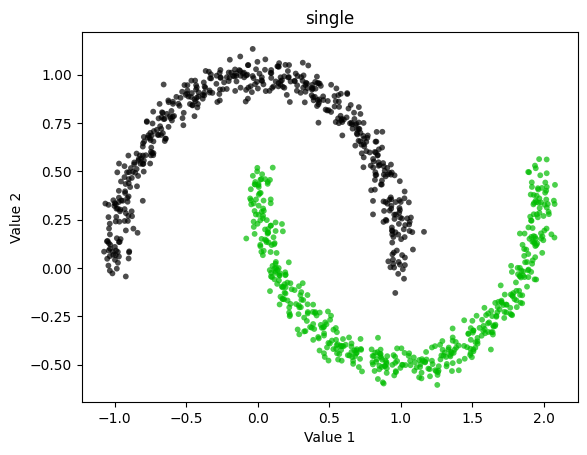

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


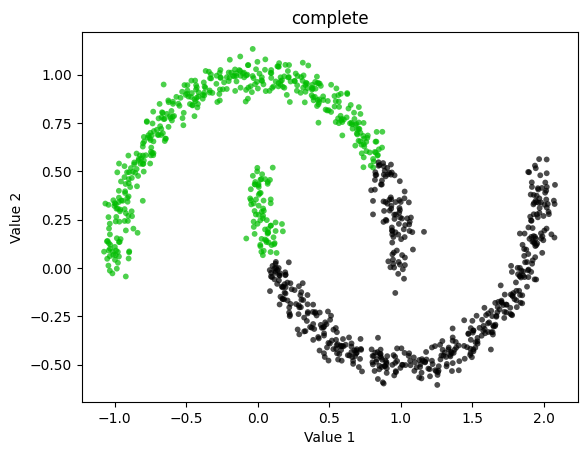

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


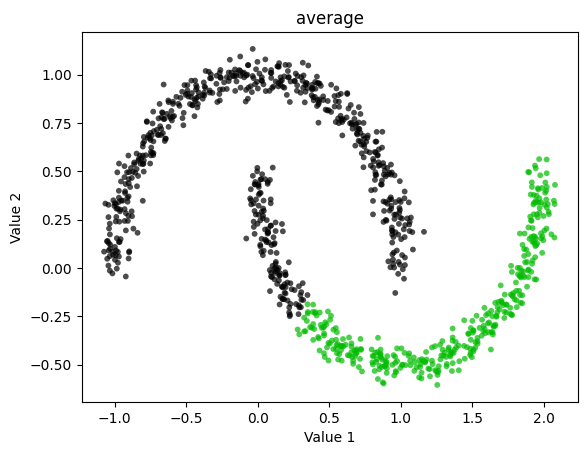

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


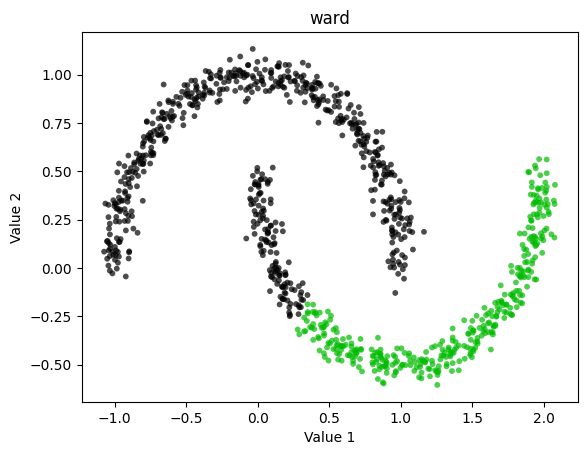

In [51]:
for m in method:
  clustering_model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage=m)
  clustering_labels = clustering_model.fit_predict(x)
      
  plt.figure()        
  colors = cm.nipy_spectral(clustering_labels.astype(float) / 2)
  plt.scatter(x[:, 0], x[:, 1], marker='.', s=70, lw=0, alpha=0.7, c=colors, edgecolor='k')
      
  plt.title(m)
  plt.xlabel("Value 1")
  plt.ylabel("Value 2")
  plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.7049787496083262


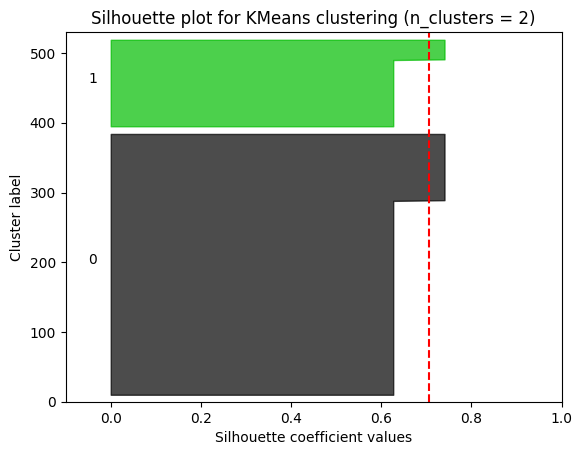

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.5882004012129721


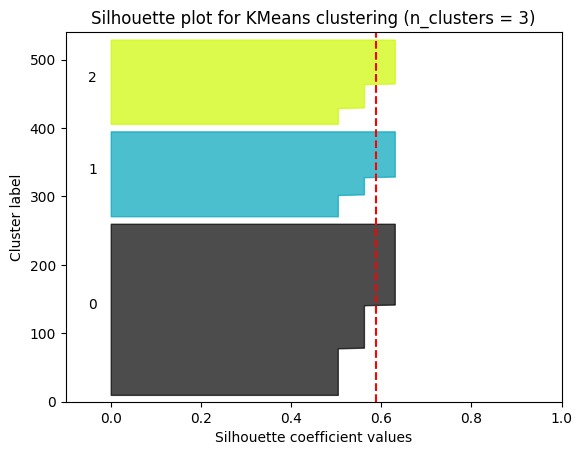

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.6505186632729437


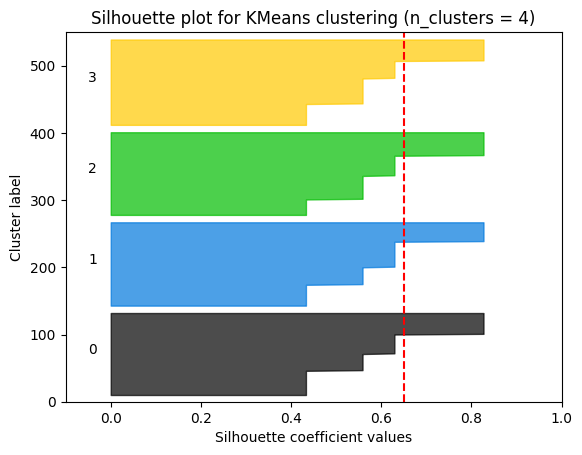

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.56376469026194


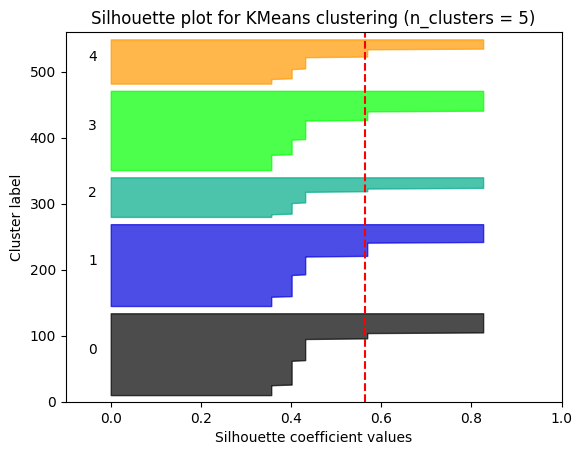

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.4504666294372765


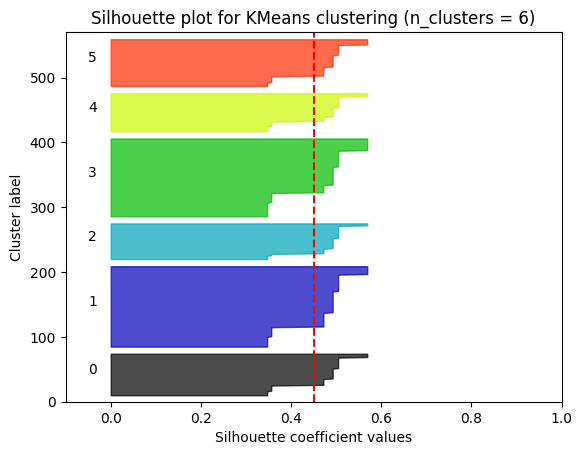

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7 The average silhouette_score is : 0.39092211029930857


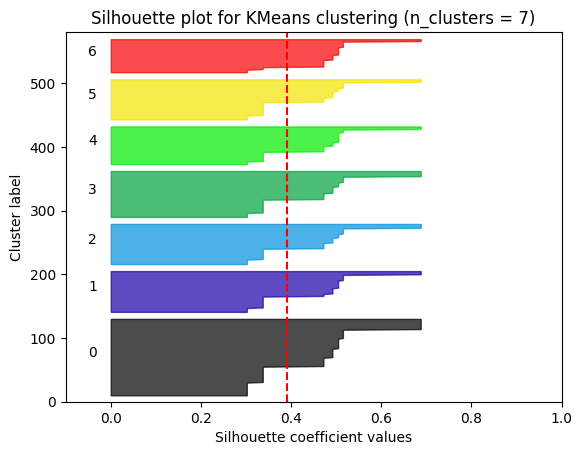

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

X, y = make_blobs(n_samples=500, n_features=2, centers=4,
                  cluster_std=1, center_box=(-10.0, 10.0),
                  shuffle=True, random_state=1)

cluster_range = range(2, 8)

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For ", n_clusters,
          "clusters, silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    sorted_silhouette_values = np.sort(sample_silhouette_values[cluster_labels])
    fig, ax1 = plt.subplots(1, 1)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sorted_silhouette_values[cluster_labels == i]
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10
    ax1.set_title("Silhouette plot for KMeans clustering (n_clusters = {})".format(n_clusters))
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


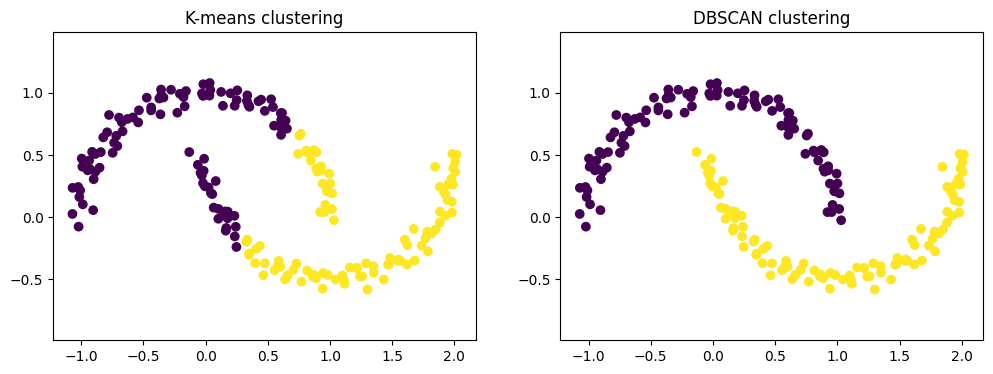

In [54]:
X, y = make_moons(n_samples=200, noise=.05, random_state=0)

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans_labels = kmeans.fit_predict(X)

dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-means clustering')
plt.axis('equal')

plt.subplot(122)
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN clustering')
plt.axis('equal')

plt.show()